# **PLS / PCA 를 이용한 Odor 분석**

In [1]:
import rpy2
%load_ext rpy2.ipython

In [2]:
%%R

.libPaths("/content/drive/MyDrive/R packages")
.libPaths()

[1] "/content/drive/MyDrive/R packages" "/usr/local/lib/R/site-library"    
[3] "/usr/lib/R/site-library"           "/usr/lib/R/library"               


## **0. Packages Installation**

In [3]:
%%R

# install.packages("corrplot")                  
# install.packages("PerformanceAnalytics")      # 상관분석 시각화
# install.packages("pls")                       # pls
# install.packages("caret")         
# install.packages("stringr")
# install.packages("devtools")
# install.packages("lmtest")      # Durbin-Watson test (잔차의 독립성)
# install.packages("car")         # 다중공선성
# install.packages("Metrics")     # RMSE, MAPE

library(Metrics)
library(car)
library(lmtest)
library(devtools)
library(stringr)
library(corrplot)
library(PerformanceAnalytics)
library(pls)
library(caret)

R[write to console]: Loading required package: carData

R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: ‘zoo’


R[write to console]: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


R[write to console]: Loading required package: usethis

R[write to console]: corrplot 0.84 loaded

R[write to console]: Loading required package: xts

R[write to console]: 
Attaching package: ‘PerformanceAnalytics’


R[write to console]: The following object is masked from ‘package:graphics’:

    legend


R[write to console]: 
Attaching package: ‘pls’


R[write to console]: The following object is masked from ‘package:corrplot’:

    corrplot


R[write to console]: The following object is masked from ‘package:stats’:

    loadings


R[write to console]: Loading required package: lattice

R[write to console]: Loading required package: ggplot2

R[write to console]: 
Attaching package: ‘caret’


R[write to console]: The followin

**plsVarSel은  R version 4.0.5에서 지원하지 않으므로, Version을 지정해 다운해야된다.**

In [4]:
%%R
# install_version("plsVarSel", version = "0.9.6", repos = "http://cran.us.r-project.org")    # VIP
library(plsVarSel)

## **I. Data**

- Standardization

- Log + Standardization

In [5]:
%%R

setwd("/content/drive/Othercomputers/내 컴퓨터/라벨이 지정되지 않은 볼륨[F]/교수님/PLS 양돈 농가/데이터/")

In [6]:
%%R

odor <- read.csv("New_data.csv", fileEncoding = "euc-kr")
st <- read.csv("standardization.csv", fileEncoding = "euc-kr")
lst <- read.csv("log standardization.csv", fileEncoding = "euc-kr")

In [7]:
%%R

print(head(st))
print(summary(st))

          ou        nh3         h2s         mm         dms       dmds
1 -0.8486138 -1.0437124 -0.55173911 -0.5509004  0.01329568 -0.2655626
2 -0.8486138 -1.0319730 -0.13722409  0.1952964  7.37708082 -0.2655626
3 -0.7504659 -0.9634928 -0.68865468 -0.5528325  0.85098361 -0.2655626
4  0.3318133 -0.9537100 -0.05180887 -0.5528325  0.01657430  0.7435754
5 -0.8419822 -0.9224048 -0.13219966 -0.5528325 -0.19588041 -0.2655626
6 -0.6039073 -0.9615363 -0.76176006 -0.5528325 -0.19588041 -0.2655626
          aca        ppa         iba        bta        iva         vla
1 -0.92409318 -1.0088217 -0.97068791 -1.0411222 -0.7927354 -0.60665532
2  0.70474213  1.7399088  1.93180389  2.0291478  1.8193896  1.41325974
3  0.23939738  0.8961961  0.97249881  1.5857145  0.9605351  0.91898692
4 -0.07799678  0.4551349  0.34852725  1.2091408  0.5705152  0.15248434
5 -0.23659274  0.1835946  0.13225351  0.7469359  0.4773933  0.04692722
6 -0.33753082 -0.1345084 -0.04278621  0.7739339  0.2295371  0.01579166
           ph

In [8]:
%%R

print(head(lst))
print(summary(lst))

          ou       nh3        h2s         mm        dms       dmds        aca
1 -1.2358488 -2.061472 -0.3632959 -0.6387885  1.4717402 -0.3059095 -1.0845046
2 -1.2358488 -1.954099  0.3417926  1.0646023  2.8315869 -0.3059095  0.7736260
3 -0.8282020 -1.481942 -0.8007143 -0.8958656  2.0814416 -0.3059095  0.5969860
4  0.7325348 -1.428919  0.4383633 -0.8958656  1.4776193  2.4348502  0.4322524
5 -1.2025163 -1.275205  0.3477602 -0.8958656 -0.7155912 -0.3059095  0.3266045
6 -0.4205755 -1.471122 -1.1607014 -0.8958656 -0.7155912 -0.3059095  0.2468862
         ppa        iba        bta        iva        vla         ph         pc
1 -1.4333782 -1.7488895 -1.6889625 -1.8762098 -1.3493373 -0.6483724 -4.8035459
2  1.0079342  1.3100059  1.1390255  1.3637144  1.3065706  1.0992944  0.8472289
3  0.7937802  0.9859590  1.0422849  1.0790801  1.1390360  0.5572743  0.3691276
4  0.6410831  0.6778094  0.9465130  0.9003902  0.7262552  0.1924267  0.2962254
5  0.5229673  0.5373968  0.8046280  0.8503071  0.6387457  0

## **II. PLS**

### **1. Best Component**

In [9]:
%%R

### Validation method : Leave-One-Out
st_pr <- plsr(ou ~ ., data = st, ncomp = ncol(st)-1, validation = "LOO")               # 기본
lst_pr <- plsr(ou ~ ., data = lst, ncomp = ncol(lst)-1, validation = "LOO")   # Log

St :  4 
Log + St :  2

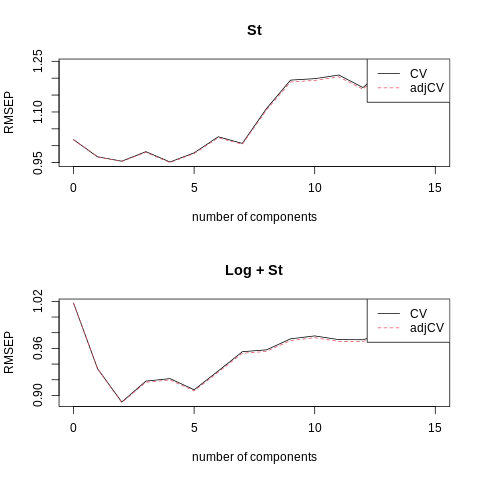

In [10]:
%%R

par(mfrow = c(2,1))
plot(RMSEP(st_pr), legendpos = "topright", main = "St")
plot(RMSEP(lst_pr), legendpos = "topright", main = "Log + St")
par(mfrow = c(1,1))

# 최적의 ncomp 수 
st_ocom = which.min(st_pr$validation$PRESS)
lst_ocom = which.min(lst_pr$validation$PRESS)

cat("St : ", st_ocom, "\n")
cat("Log + St : ", lst_ocom)

### **2. PLS dataset from best comp**

#### **- Dataset**

In [11]:
%%R

### Best Component로 PLS 진행.
best_pr <- plsr(ou ~ ., data = st, ncomp = st_ocom, validation = "LOO")               # 기본
best_log_pr <- plsr(ou ~ ., data = lst, ncomp = lst_ocom, validation = "LOO")   # Log

In [12]:
%%R

### PLS로 새로운 Datset 생성

# St
st_pls_X <- matrix(as.numeric(best_pr$scores), ncol = ncol(best_pr$scores))
st_pls <- cbind(st["ou"], st_pls_X)
colnames(st_pls) <- c("ou", colnames(best_pr$scores))

# Log + St
lst_pls_X <- matrix(as.numeric(best_log_pr$scores), ncol = ncol(best_log_pr$scores))
lst_pls <- cbind(lst["ou"], lst_pls_X)
colnames(lst_pls) <- c("ou", colnames(best_log_pr$scores))


print(head(st_pls))
print(head(lst_pls))

          ou     Comp 1     Comp 2       Comp 3     Comp 4
1 -0.8486138 -2.5618473 -0.5335537 -0.329435047 -0.3074565
2 -0.8486138  1.7773913 -4.3242803 -0.066335293  0.1497039
3 -0.7504659  0.3015703 -1.9279887  0.590132378  0.6685402
4  0.3318133  0.2911168 -1.2803203 -0.003509979  1.1989914
5 -0.8419822 -0.5406450 -1.0837383  0.513376441  0.4675704
6 -0.6039073 -0.8902255 -0.9587943  0.542661063  0.6475315
          ou      Comp 1    Comp 2
1 -1.2358488 -5.00159440 -0.889914
2 -1.2358488  2.25985262 -1.578503
3 -0.8282020  0.61062129 -2.566600
4  0.7325348  1.26922913 -1.505523
5 -1.2025163 -0.07636859 -1.995321
6 -0.4205755 -0.57419095 -2.295855


#### **- Correlation**

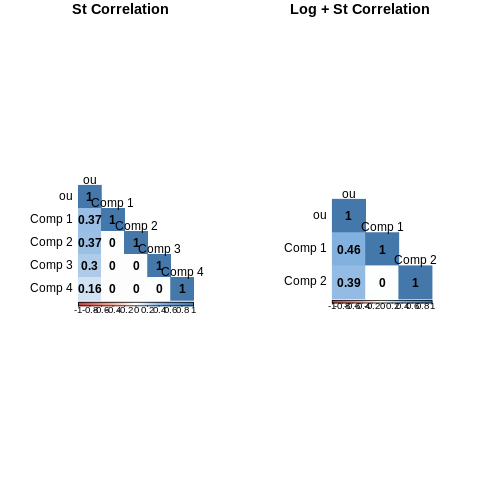

In [13]:
%%R

st_pls_corr <- cor(st_pls, method = "pearson")
lst_pls_corr <- cor(lst_pls, method = "pearson")

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

par(mfrow = c(1,2))
corrplot::corrplot(st_pls_corr, method = "color", col = col(200), order = "original", 
                   tl.col = "black", tl.srt = 0, 
                   type = "lower", 
                   addCoef.col = "black",
                   main = "\nSt Correlation")

corrplot::corrplot(lst_pls_corr, method = "color", col = col(200), order = "original", 
                   tl.col = "black", tl.srt = 0, 
                   type = "lower", 
                   addCoef.col = "black",
                   main = "\nLog + St Correlation")
par(mfrow = c(1,1))

### **3. PLS Regression**

#### **- regression**

In [14]:
%%R

st_pls_reg <- lm(ou ~ ., data = st_pls)
lst_pls_reg <- lm(ou ~ ., data = lst_pls)

print(summary(st_pls_reg))
cat("===================================\n===================================")
print(summary(lst_pls_reg))


Call:
lm(formula = ou ~ ., data = st_pls)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1411 -0.5903 -0.1337  0.3437  3.6280 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -5.129e-17  1.082e-01   0.000  1.00000   
`Comp 1`     1.499e-01  4.324e-02   3.465  0.00107 **
`Comp 2`     2.750e-01  8.056e-02   3.414  0.00125 **
`Comp 3`     4.154e-01  1.514e-01   2.743  0.00833 **
`Comp 4`     2.486e-01  1.670e-01   1.488  0.14269   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.817 on 52 degrees of freedom
Multiple R-squared:  0.3911,	Adjusted R-squared:  0.3443 
F-statistic: 8.351 on 4 and 52 DF,  p-value: 2.792e-05

Call:
lm(formula = ou ~ ., data = lst_pls)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.01269 -0.51455 -0.01066  0.74156  1.77859 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.426e-17  1.086e-01   0.000 1.000000    
`Comp 1`     1

#### **- VIF**

In [15]:
%%R

st_pls_vif <- vif(st_pls_reg)
cat("St PLS VIF\n")
print(round(st_pls_vif, 3))

lst_pls_vif <- vif(lst_pls_reg)
cat("Log + St PLS VIF\n")
print(round(lst_pls_vif, 3))

St PLS VIF
`Comp 1` `Comp 2` `Comp 3` `Comp 4` 
       1        1        1        1 
Log + St PLS VIF
`Comp 1` `Comp 2` 
       1        1 


#### **- 가설 검정**

In [16]:
%%R

### St
bptest_df = data.frame(Ts = round(bptest(st_pls_reg)$statistic, 3), p_value = round(bptest(st_pls_reg)$p.value, 3))
rownames(bptest_df) = c("BP (등분산성)")

dwtest_df = data.frame(Ts = round(dwtest(st_pls_reg)$statistic, 3), p_value = round(dwtest(st_pls_reg)$p.value, 3))
rownames(dwtest_df) = c("DW (독립성)")

st_pls_res <- residuals(st_pls_reg)
shapiro_df = data.frame(Ts = round(shapiro.test(st_pls_res)$statistic, 3), p_value = round(shapiro.test(st_pls_res)$p.value, 3))
rownames(shapiro_df) = c("Shapiro (정규성)")

st_res_df <- rbind(bptest_df, dwtest_df, shapiro_df)
print("Standardization")
print(st_res_df)

### Log + St
log_bptest_df = data.frame(Ts = round(bptest(lst_pls_reg)$statistic, 3), p_value = round(bptest(lst_pls_reg)$p.value, 3))
rownames(log_bptest_df) = c("BP (등분산성)")

log_dwtest_df = data.frame(Ts = round(dwtest(lst_pls_reg)$statistic, 3), p_value = round(dwtest(lst_pls_reg)$p.value, 3))
rownames(log_dwtest_df) = c("DW (독립성)")

lst_pls_res <- residuals(lst_pls_reg)
log_shapiro_df = data.frame(Ts = round(shapiro.test(lst_pls_res)$statistic, 3), p_value = round(shapiro.test(lst_pls_res)$p.value, 3))
rownames(log_shapiro_df) = c("Shapiro (정규성)")

lst_res_df <- rbind(log_bptest_df, log_dwtest_df, log_shapiro_df)
print("=========================")
print("Log + Standardization")
print(lst_res_df)

[1] "Standardization"
                    Ts p_value
BP (등분산성)    1.211   0.876
DW (독립성)      1.760   0.143
Shapiro (정규성) 0.817   0.000
[1] "========================="
[1] "Log + Standardization"
                    Ts p_value
BP (등분산성)    0.598   0.742
DW (독립성)      1.793   0.178
Shapiro (정규성) 0.981   0.500


## **III. PCA**

### **1. Best Component**

In [17]:
%%R

st_pcr <- prcomp(st[,2 : ncol(st)])
lst_pcr <- prcomp(lst[,2 : ncol(lst)])

St :  5
Log + St :  6

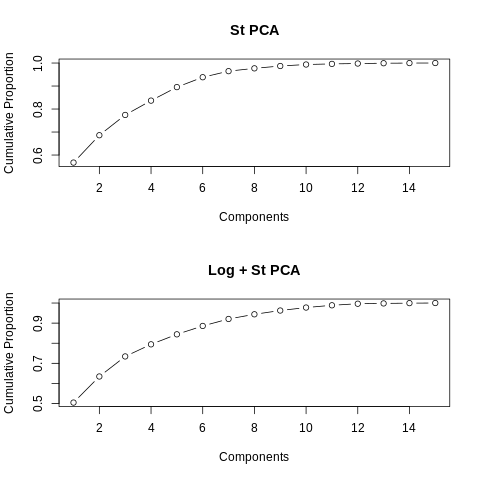

In [18]:
%%R

par(mfrow = c(2, 1))
plot(summary(st_pcr)$importance[3, ], type="b", main = "St PCA", 
     xlab = "Components", ylab = "Cumulative Proportion")
plot(summary(lst_pcr)$importance[3, ], type="b", main = "Log + St PCA",
     xlab = "Components", ylab = "Cumulative Proportion")
par(mfrow = c(1, 1))


### 누적 설명력이 85이 넘는 첫 PC 위치
base = 0.85
st_pca_ocomp <- which(summary(st_pcr)$importance[3,] > base)[1] 
lst_pca_ocomp <- which(summary(lst_pcr)$importance[3,] > base)[1] 

cat("St : ", st_pca_ocomp)
cat("\nLog + St : ", lst_pca_ocomp)

### **2. PCA dataset from best comp**

#### **- Dataset**

In [19]:
%%R

st_pcr_x <- as.matrix(st[, 2:ncol(st)]) %*% as.matrix(st_pcr$rotation)
st_pca <- cbind(st["ou"], st_pcr_x[, 1:st_pca_ocomp])


lst_pcr_x <- as.matrix(lst[, 2:ncol(lst)]) %*% as.matrix(lst_pcr$rotation)
lst_pca <- cbind(lst["ou"], lst_pcr_x[, 1:lst_pca_ocomp])


print(head(st_pca))
print(head(lst_pca))

          ou         PC1       PC2        PC3         PC4        PC5
1 -0.8486138 -2.58212547 0.6223029 -0.5791285 -0.08642103 -0.4691913
2 -0.8486138  4.52054490 3.3540095 -3.4160568  3.15851046  4.5726179
3 -0.7504659  1.49890277 1.9039298 -1.0740026  0.63086326 -0.1969840
4  0.3318133  1.07340557 0.9402924 -0.5408960 -0.61930827 -0.2756593
5 -0.8419822  0.05560368 1.2890592 -0.3090380 -0.25140680 -0.4599381
6 -0.6039073 -0.40856277 1.2037523 -0.6477262  0.06509869 -0.8170627
          ou        PC1         PC2       PC3         PC4        PC5        PC6
1 -1.2358488 -5.1118471 -0.39479847 -3.012090 -0.51052269 -1.5477661 -0.5935280
2 -1.2358488  3.4171523 -1.24195723 -2.365970 -0.45238776 -1.8707144  1.1935733
3 -0.8282020  2.2070353  0.09430395 -2.583469  0.03935475 -0.3709702  1.0093950
4  0.7325348  2.2448029 -0.70715950 -1.489572 -2.11631042  0.2140444 -0.5294202
5 -1.2025163  1.2099219  1.69100970 -1.276857 -0.57552106  0.1754968 -0.3321776
6 -0.4205755  0.8064227  1.32310231 -

#### **- Correlation**

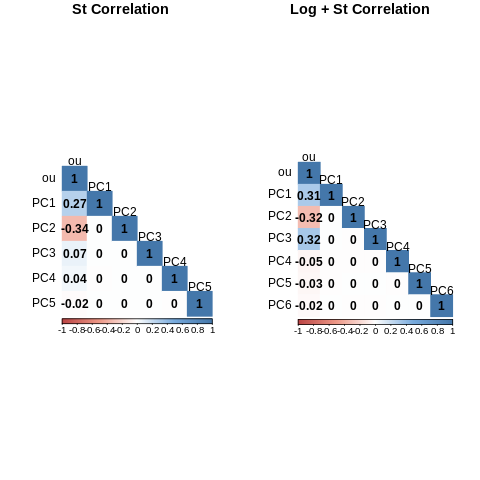

In [20]:
%%R

st_pca_corr <- cor(st_pca, method = "pearson")
lst_pca_corr <- cor(lst_pca, method = "pearson")

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

par(mfrow = c(1,2))
corrplot::corrplot(st_pca_corr, method = "color", col = col(200), order = "original", 
                   tl.col = "black", tl.srt = 0, 
                   type = "lower", 
                   addCoef.col = "black",
                   main = "\nSt Correlation")

corrplot::corrplot(lst_pca_corr, method = "color", col = col(200), order = "original", 
                   tl.col = "black", tl.srt = 0, 
                   type = "lower", 
                   addCoef.col = "black",
                   main = "\nLog + St Correlation")
par(mfrow = c(1,1))

### **3. PCA Regression**

#### **- regression**

In [21]:
%%R

st_pca_reg <- lm(ou ~ ., data = st_pca)
lst_pca_reg <- lm(ou ~ ., data = lst_pca)

print(summary(st_pca_reg))
cat("===================================\n===================================")
print(summary(lst_pca_reg))


Call:
lm(formula = ou ~ ., data = st_pca)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2828 -0.5249 -0.2866  0.4431  3.4987 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.080e-16  1.259e-01   0.000  1.00000   
PC1          9.108e-02  4.316e-02   2.110  0.03977 * 
PC2         -2.525e-01  9.430e-02  -2.678  0.00995 **
PC3          6.163e-02  1.095e-01   0.563  0.57588   
PC4          4.643e-02  1.303e-01   0.356  0.72307   
PC5         -1.604e-02  1.342e-01  -0.120  0.90532   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9506 on 51 degrees of freedom
Multiple R-squared:  0.1915,	Adjusted R-squared:  0.1122 
F-statistic: 2.416 on 5 and 51 DF,  p-value: 0.04846

Call:
lm(formula = ou ~ ., data = lst_pca)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.04837 -0.50734 -0.03793  0.60250  1.77784 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.41

#### **- VIF**

In [22]:
%%R

st_pca_vif <- vif(st_pca_reg)
cat("St PCA VIF\n")
print(round(st_pca_vif, 3))

lst_pca_vif <- vif(lst_pca_reg)
cat("Log + St PCA VIF\n")
print(round(lst_pca_vif, 3))

St PCA VIF
PC1 PC2 PC3 PC4 PC5 
  1   1   1   1   1 
Log + St PCA VIF
PC1 PC2 PC3 PC4 PC5 PC6 
  1   1   1   1   1   1 


#### **- 가설 검정**

In [23]:
%%R

### St
bptest_df = data.frame(Ts = round(bptest(st_pca_reg)$statistic, 3), p_value = round(bptest(st_pca_reg)$p.value, 3))
rownames(bptest_df) = c("BP (등분산성)")

dwtest_df = data.frame(Ts = round(dwtest(st_pca_reg)$statistic, 3), p_value = round(dwtest(st_pca_reg)$p.value, 3))
rownames(dwtest_df) = c("DW (독립성)")

st_pca_res <- residuals(st_pca_reg)
shapiro_df = data.frame(Ts = round(shapiro.test(st_pca_res)$statistic, 3), p_value = round(shapiro.test(st_pca_res)$p.value, 3))
rownames(shapiro_df) = c("Shapiro (정규성)")

st_res_df <- rbind(bptest_df, dwtest_df, shapiro_df)
print("Standardization")
print(st_res_df)

### Log + St
log_bptest_df = data.frame(Ts = round(bptest(lst_pca_reg)$statistic, 3), p_value = round(bptest(lst_pca_reg)$p.value, 3))
rownames(log_bptest_df) = c("BP (등분산성)")

log_dwtest_df = data.frame(Ts = round(dwtest(lst_pca_reg)$statistic, 3), p_value = round(dwtest(lst_pca_reg)$p.value, 3))
rownames(log_dwtest_df) = c("DW (독립성)")

lst_pca_res <- residuals(lst_pca_reg)
log_shapiro_df = data.frame(Ts = round(shapiro.test(lst_pca_res)$statistic, 3), p_value = round(shapiro.test(lst_pca_res)$p.value, 3))
rownames(log_shapiro_df) = c("Shapiro (정규성)")

lst_res_df <- rbind(log_bptest_df, log_dwtest_df, log_shapiro_df)
print("=========================")
print("Log + Standardization")
print(lst_res_df)

[1] "Standardization"
                    Ts p_value
BP (등분산성)    2.668   0.751
DW (독립성)      1.707   0.086
Shapiro (정규성) 0.820   0.000
[1] "========================="
[1] "Log + Standardization"
                    Ts p_value
BP (등분산성)    4.351   0.629
DW (독립성)      1.770   0.142
Shapiro (정규성) 0.984   0.676


## **IV. Result**

- Log PLS 와 Log PCA만 가설검정 통과

### **1. Function reg_loocv**

In [24]:
%%R

reg_loocv <- function(data) {
                  
                  predict <- rep(0, nrow(data))
                  real <- rep(0, nrow(data))

                  for (i in 1 : nrow(data)) {
                      train <- data[-i, 1:ncol(data)]
                      test <- data[i, 1:ncol(data)]

                      test_y = test[1:nrow(test), 1]
                      test_X = test[1:nrow(test), 2:ncol(test)]

                      reg_fit = lm(ou ~ . , data = train)

                      predict[i] = predict(reg_fit, newdata = test_X)
                      real[i] = test_y
                  }
                  return (list(predict = predict, real = real))
              }

In [25]:
%%R

# st_pls_result <- reg_loocv(data = st_pls)
# st_pls_pred <- st_pls_result$predict  ; st_pls_real <- st_pls_result$real

lst_pls_result <- reg_loocv(data = lst_pls)
lst_pls_pred <- lst_pls_result$predict  ; lst_pls_real <- lst_pls_result$real

# st_pca_result <- reg_loocv(data = st_pca)
# st_pca_pred <- st_pca_result$predict  ; st_pca_real <- st_pca_result$real

lst_pca_result <- reg_loocv(data = lst_pca)
lst_pca_pred <- lst_pca_result$predict  ; lst_pca_real <- lst_pca_result$real

### **2. Results**

#### **- DataFrame**

In [26]:
%%R

# st_pls_result_value <- as.data.frame(cbind(real = st_pls_real, pred = st_pls_pred, diff= st_pls_real-st_pls_pred))
lst_pls_result_value <- as.data.frame(cbind(real = lst_pls_real, pred = lst_pls_pred, diff = lst_pls_real-lst_pls_pred))

# st_pca_result_value <- as.data.frame(cbind(real = st_pca_real, pred = st_pca_pred, diff= st_pca_real-st_pca_pred))
lst_pca_result_value <- as.data.frame(cbind(real = lst_pca_real, pred = lst_pca_pred, diff = lst_pca_real-lst_pca_pred))

# print(head(st_pls_result_value))
print(head(lst_pls_result_value))

# print(head(st_pca_result_value))
print(head(lst_pca_result_value))

        real        pred        diff
1 -1.2358488 -1.22392972 -0.01191906
2 -1.2358488  0.08841619 -1.32426497
3 -0.8282020 -0.55716588 -0.27103615
4  0.7325348 -0.19825699  0.93079179
5 -1.2025163 -0.52250200 -0.68001434
6 -0.4205755 -0.75768775  0.33711220
        real        pred        diff
1 -1.2358488 -1.14396774 -0.09188104
2 -1.2358488  0.54498468 -1.78083346
3 -0.8282020 -0.42124003 -0.40696200
4  0.7325348  0.01891784  0.71361696
5 -1.2025163 -0.50807434 -0.69444200
6 -0.4205755 -0.82050682  0.39993128


#### **- Plots**

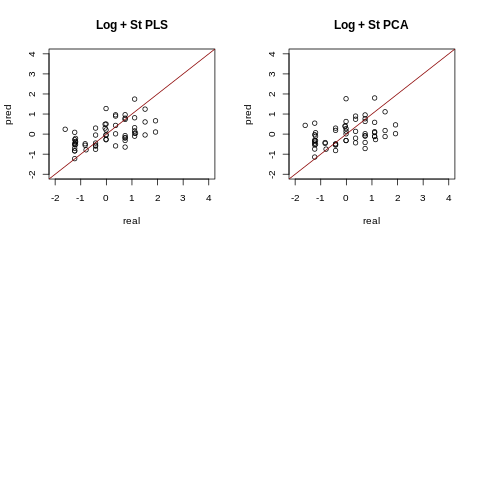

In [27]:
%%R

par(mfrow = c(2, 2))
# plot(st_pls_real, st_pls_pred, 
#      xlim = c(-2,4 ), ylim = c(-2, 4), 
#      xlab = "real", ylab = "pred", main = "St PLS")
# abline(a = 0, b = 1, col = "darkred")

plot(lst_pls_real, lst_pls_pred, 
     xlim = c(-2,4 ), ylim = c(-2, 4), 
     xlab = "real", ylab = "pred", main = "Log + St PLS")
abline(a = 0, b = 1, col = "darkred")

# plot(st_pca_real, st_pca_pred, 
#      xlim = c(-2,4 ), ylim = c(-2, 4), 
#      xlab = "real", ylab = "pred", main = "St PCA")
# abline(a = 0, b = 1, col = "darkred")

plot(lst_pca_real, lst_pca_pred, 
     xlim = c(-2,4 ), ylim = c(-2, 4), 
     xlab = "real", ylab = "pred", main = "Log + St PCA")
abline(a = 0, b = 1, col = "darkred")
par(mfrow = c(1 ,1))

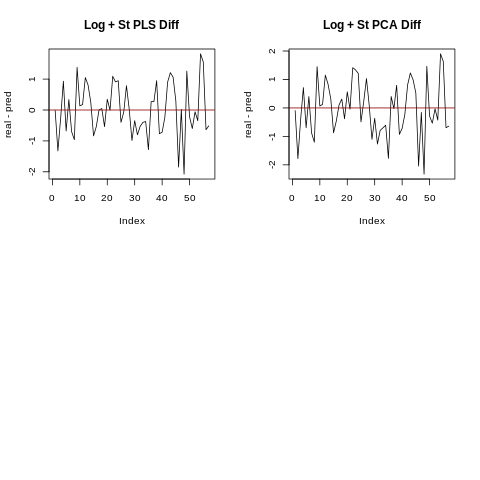

In [28]:
%%R

par(mfrow = c(2, 2))
# plot(st_pls_result_value$diff, type = "l", 
#      main = "St PLS Diff", ylab = "real - pred")
# abline(h = 0, col = "darkred")

plot(lst_pls_result_value$diff, type = "l", 
     main = "Log + St PLS Diff", ylab = "real - pred")
abline(h = 0, col = "darkred")

# plot(st_pca_result_value$diff, type = "l", 
#      main = "St PCA Diff", ylab = "real - pred")
# abline(h = 0, col = "darkred")

plot(lst_pca_result_value$diff, type = "l", 
     main = "Log + St PCA Diff", ylab = "real - pred")
abline(h = 0, col = "darkred")
par(mfrow = c(1, 1))

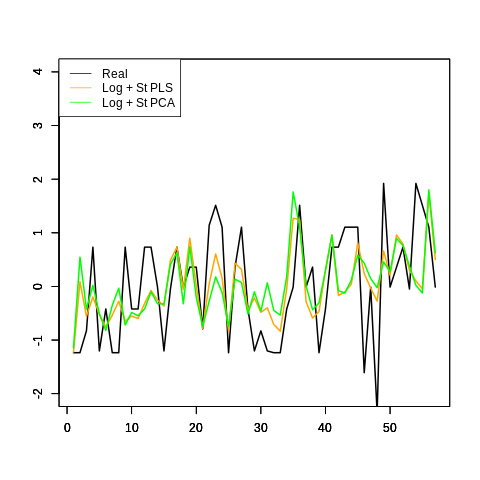

In [29]:
%%R

plot(lst_pls_real, type = "l", col = "black", ylim = c(-2, 4), lwd = 2, xlab = "", ylab = "")
# par(new = T) ; plot(st_pls_pred, type = "l", col = "red", ylim = c(-2, 4), lwd = 2, xlab = "", ylab = "")
par(new = T) ; plot(lst_pls_pred, type = "l", col = "orange", ylim = c(-2, 4), lwd = 2, xlab = "", ylab = "")
# par(new = T) ; plot(st_pca_pred, type = "l", col = "blue", ylim = c(-2, 4), lwd = 2, xlab = "", ylab = "")
par(new = T) ; plot(lst_pca_pred, type = "l", col = "green", ylim = c(-2, 4), lwd = 2, xlab = "", ylab = "")
# legend("topleft", legend = c("Real", "St PLS", "Log + St PLS", "St PCA", "Log + St PCA"), lty = 1, col = c("black", "red", "orange", "blue", "green"))
legend("topleft", legend = c("Real", "Log + St PLS",  "Log + St PCA"), lty = 1, col = c("black", "orange", "green"))


#### **- Finals**

In [30]:
%%R

st_real <- st$ou
lst_real <- lst$ou

### R2
# st_pls_r2 <- round(cor(st_real, st_pls_pred)^2, 3)
lst_pls_r2 <- round(cor(lst_real, lst_pls_pred)^2, 3)
# st_pca_r2 <- round(cor(st_real, st_pca_pred)^2, 3)
lst_pca_r2 <- round(cor(lst_real, lst_pca_pred)^2, 3)

# r2_result <- c(st_pls_r2, lst_pls_r2, st_pca_r2, lst_pca_r2)
r2_result <- c(lst_pls_r2, lst_pca_r2)


### RMSE
# st_pls_rmse <- round(rmse(st_real, st_pls_pred), 3)
lst_pls_rmse <- round(rmse(lst_real, lst_pls_pred), 3)
# st_pca_rmse <- round(rmse(st_real, st_pca_pred), 3)
lst_pca_rmse <- round(rmse(lst_real, lst_pca_pred), 3)

# rmse_result <- c(st_pls_rmse, lst_pls_rmse, st_pca_rmse, lst_pca_rmse)
rmse_result <- c(lst_pls_rmse, lst_pca_rmse)


### MAPE
# st_pls_mape <- round(mape(st_real, st_pls_pred), 3)
lst_pls_mape <- round(mape(lst_real, lst_pls_pred), 3)
# st_pca_mape <- round(mape(st_real, st_pca_pred), 3)
lst_pca_mape <- round(mape(lst_real, lst_pca_pred), 3)

# mape_result <- c(st_pls_mape, lst_pls_mape, st_pca_mape, lst_pca_mape)
mape_result <- c(lst_pls_mape, lst_pca_mape)

In [31]:
%%R

# results <- rbind(r2_result, rmse_result, mape_result)
# colnames(results) <- c("St PLS", "Log + St PLS", "St PCA", "Log + St PCA")
# rownames(results) <- c("R2", "RMSE", "MAPE")

# results

results <- rbind(r2_result, rmse_result, mape_result)
colnames(results) <- c("Log + St PLS", "Log + St PCA")
rownames(results) <- c("R2", "RMSE", "MAPE")

results

     Log + St PLS Log + St PCA
R2          0.310        0.137
RMSE        0.832        0.954
MAPE        4.780        6.187
